### Importing Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [17]:
data = pd.read_csv('divorce_data.csv', sep = ';')
with open('reference.tsv') as file:
    info = file.readlines()

In [101]:
info[1:10]

['1|If one of us apologizes when our discussion deteriorates, the discussion ends.\n',
 '2|I know we can ignore our differences, even if things get hard sometimes.\n',
 '3|When we need it, we can take our discussions with my spouse from the beginning and correct it.\n',
 '4|When I discuss with my spouse, to contact him will eventually work.\n',
 '5|The time I spent with my wife is special for us.\n',
 "6|We don't have time at home as partners.\n",
 '7|We are like two strangers who share the same environment at home rather than family.\n',
 '8|I enjoy our holidays with my wife.\n',
 '9|I enjoy traveling with my wife.\n']

### Gathering info about the dataset

In [20]:
data.head(3)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1


In [21]:
data.shape

(170, 55)

### Checking for Missing values

In [25]:
data.isnull().sum().sum()

0

### Droping Duplicate values

In [41]:
data.drop_duplicates(keep='last', inplace = True)

In [42]:
data.shape

(150, 55)

### Checking for the level of variance in each columns

In [75]:
data.nunique().head()

Q1    5
Q2    5
Q3    5
Q4    5
Q5    5
dtype: int64

### Target Variable

In [55]:
data['Divorce'].value_counts(normalize = True)

0    0.56
1    0.44
Name: Divorce, dtype: float64

### Numerical Analysis of the First 10 Questions

In [89]:
pd.DataFrame(data.groupby('Divorce').Q1.value_counts(normalize = True)).unstack()

Q1                                        
Q1              0         1         2         3         4
Divorce                                                  
0        0.785714  0.095238  0.071429  0.023810  0.023810
1        0.015152  0.015152  0.121212  0.515152  0.333333

In [90]:
pd.DataFrame(data.groupby('Divorce').Q2.value_counts(normalize = True)).unstack()

Q2                                        
Q2              0         1         2         3         4
Divorce                                                  
0        0.654762  0.250000  0.059524  0.035714       NaN
1        0.030303  0.030303  0.257576  0.439394  0.242424

In [96]:
pd.DataFrame(data.groupby('Divorce')['Q3'].value_counts(normalize = True)).unstack()

Q3                                        
Q3              0         1         2         3         4
Divorce                                                  
0        0.595238  0.226190  0.130952  0.035714  0.011905
1             NaN  0.060606  0.196970  0.530303  0.212121

In [97]:
pd.DataFrame(data.groupby('Divorce')['Q4'].value_counts(normalize = True)).unstack()

Q4                                        
Q4              0         1         2         3         4
Divorce                                                  
0        0.845238  0.107143  0.011905       NaN  0.035714
1        0.030303  0.045455  0.287879  0.409091  0.227273

In [98]:
pd.DataFrame(data.groupby('Divorce')['Q5'].value_counts(normalize = True)).unstack()

Q5                                   
Q5              0         1         2    3         4
Divorce                                             
0        0.916667  0.059524  0.023810  NaN       NaN
1        0.045455  0.075758  0.090909  0.5  0.287879

In [99]:
pd.DataFrame(data.groupby('Divorce')['Q6'].value_counts(normalize = True)).unstack()

Q6                                        
Q6              0         1         2         3         4
Divorce                                                  
0        0.738095  0.166667  0.083333       NaN  0.011905
1        0.242424  0.439394  0.242424  0.060606  0.015152

In [100]:
pd.DataFrame(data.groupby('Divorce')['Q7'].value_counts(normalize = True)).unstack()

Q7                                        
Q7              0         1         2         3         4
Divorce                                                  
0        0.988095  0.011905       NaN       NaN       NaN
1        0.333333  0.454545  0.075758  0.060606  0.075758

In [102]:
pd.DataFrame(data.groupby('Divorce')['Q8'].value_counts(normalize = True)).unstack()

Q8                                       
Q8              0         1        2         3         4
Divorce                                                 
0        0.904762  0.071429  0.02381       NaN       NaN
1        0.060606  0.045455  0.19697  0.469697  0.227273

In [103]:
pd.DataFrame(data.groupby('Divorce')['Q9'].value_counts(normalize = True)).unstack()

Q9                                        
Q9              0         1         2         3         4
Divorce                                                  
0        0.952381  0.047619       NaN       NaN       NaN
1        0.045455  0.030303  0.181818  0.515152  0.227273

In [104]:
pd.DataFrame(data.groupby('Divorce')['Q10'].value_counts(normalize = True)).unstack()

Q10                                        
Q10             0         1         2         3         4
Divorce                                                  
0        0.690476  0.202381  0.107143       NaN       NaN
1        0.030303  0.015152  0.287879  0.439394  0.227273

## Visualization

#### Target Variable

<AxesSubplot:xlabel='Divorce', ylabel='count'>

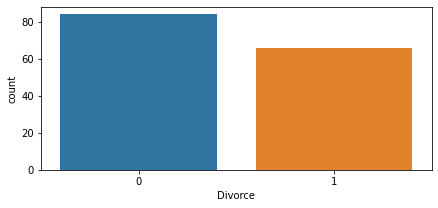

In [54]:
plt.figure(figsize = (7,3))
sns.countplot(data['Divorce'])

### Q1

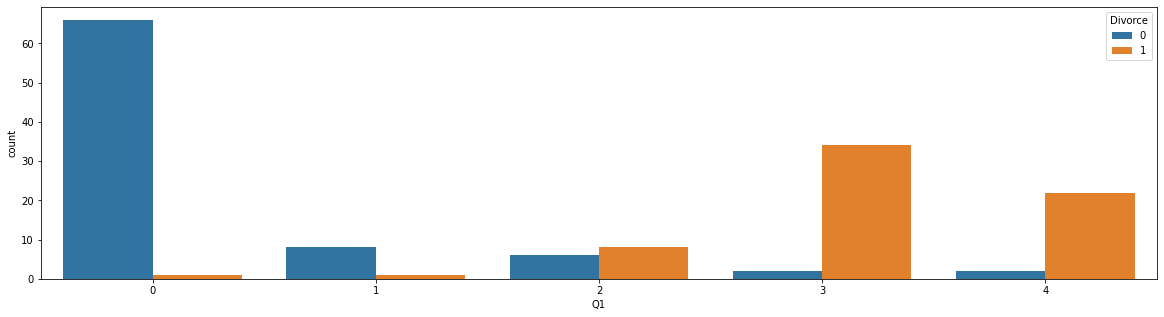

In [109]:
plt.figure(figsize = (20,5))
sns.countplot(data.Q1, hue = data.Divorce)
plt.show()

### Q2

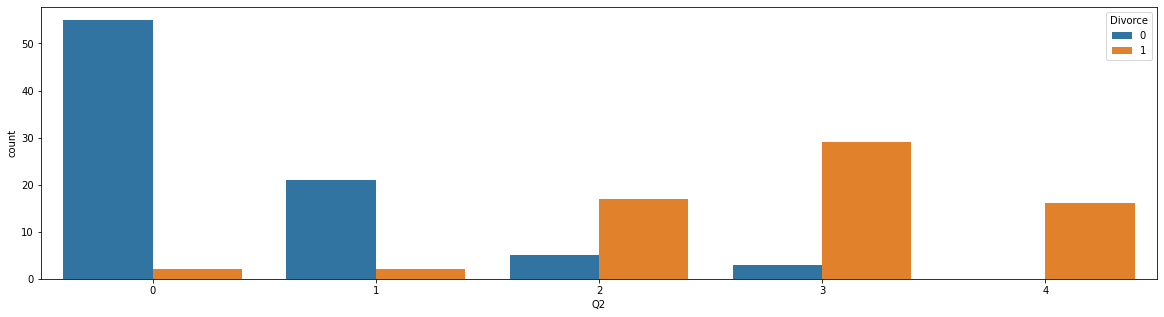

In [111]:
plt.figure(figsize = (20,5))
sns.countplot(data.Q2, hue = data.Divorce)
plt.show()

### Q3

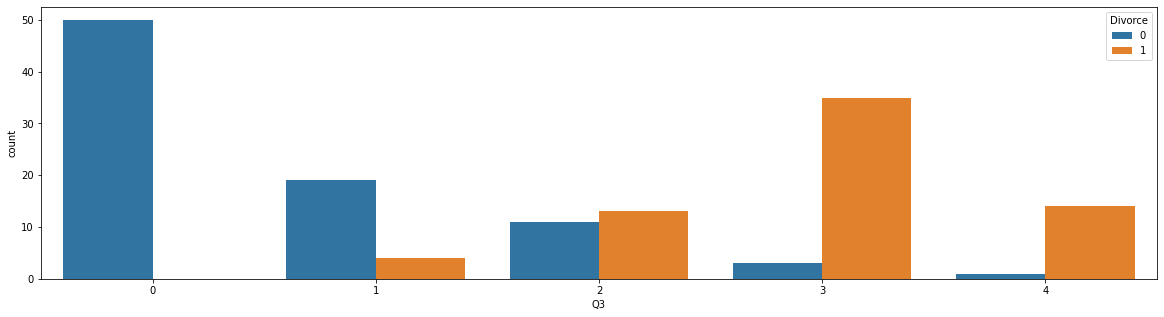

In [112]:
plt.figure(figsize = (20,5))
sns.countplot(data.Q3, hue = data.Divorce)
plt.show()

### Q4

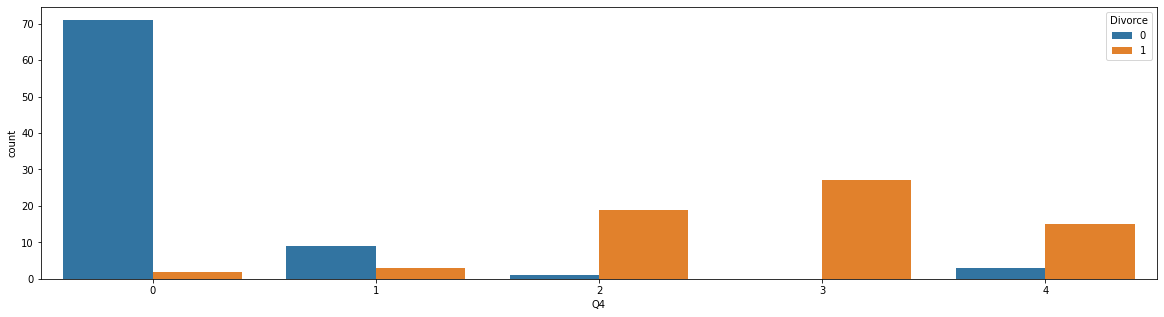

In [113]:
plt.figure(figsize = (20,5))
sns.countplot(data.Q4, hue = data.Divorce)
plt.show()

### Q5

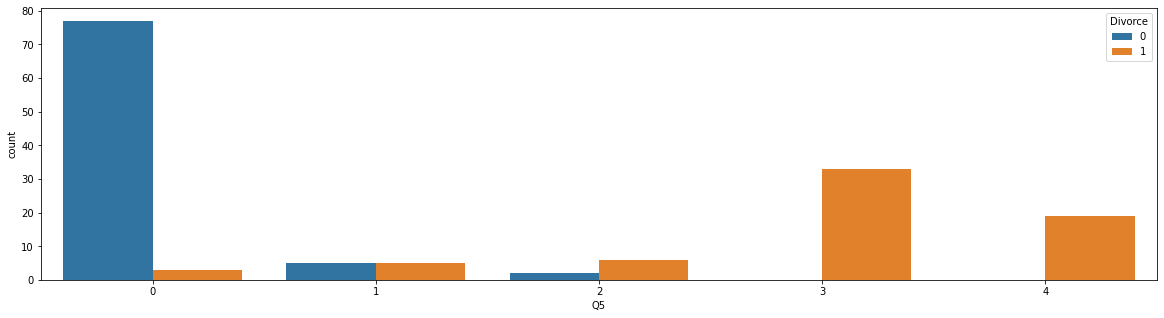

In [114]:
plt.figure(figsize = (20,5))
sns.countplot(data.Q5, hue = data.Divorce)
plt.show()